In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
# finding unique values in each column
for (colname,colval) in df.iteritems():
    print(colname, ': ', df[colname].unique(), '\n')

gender :  ['female' 'male'] 

race/ethnicity :  ['group B' 'group C' 'group A' 'group D' 'group E'] 

parental level of education :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

lunch :  ['standard' 'free/reduced'] 

test preparation course :  ['none' 'completed'] 

math score :  [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8] 

reading score :  [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40] 

writing 

# Preprocess
### Label Encoding

issue:
1.  most columns are string/object data type. Need to convere the me to
int/float type for analysis & processing.
2.  Too many outliers for each columns

In [ ]:
# creating label encoder
label_encoder = preprocessing.LabelEncoder()

In [ ]:
# label encoding for gender column
print('pre-encoding =', df.gender.unique())
df.gender = label_encoder.fit_transform(df.gender)
print('post-encoding =', df.gender.unique())

pre-encoding = ['female' 'male']
post-encoding = [0 1]


In [ ]:
# label encoding for race/ethnticity column
print('pre-encoding =', df['race/ethnicity'].unique())
df['race/ethnicity'] = label_encoder.fit_transform(df['race/ethnicity'])
print('post-encoding =', df['race/ethnicity'].unique())

pre-encoding = ['group B' 'group C' 'group A' 'group D' 'group E']
post-encoding = [1 2 0 3 4]


In [ ]:
# label encoding for parental level of education column
print('pre-encoding =', df['parental level of education'].unique())
df['parental level of education'] = label_encoder.fit_transform(df['parental level of education'])
print('post-encoding =', df['parental level of education'].unique())

pre-encoding = ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
post-encoding = [1 4 3 0 2 5]


In [ ]:
# label encoding for lunch column
print('pre-encoding =', df['lunch'].unique())
df['lunch'] = label_encoder.fit_transform(df['lunch'])
print('post-encoding =', df['lunch'].unique())

pre-encoding = ['standard' 'free/reduced']
post-encoding = [1 0]


In [ ]:
# label encoding for test preparation course column
print('pre-encoding =', df['test preparation course'].unique())
df['test preparation course'] = label_encoder.fit_transform(df['test preparation course'])
print('post-encoding =', df['test preparation course'].unique())

pre-encoding = ['none' 'completed']
post-encoding = [1 0]


In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


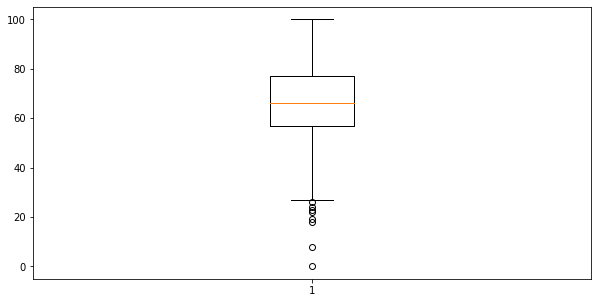

In [ ]:
# fixing outliers for math score column
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 5))
aa = plt.boxplot(df['math score'])
ab = plt.show()

In [ ]:
# finding the 1st quartile
q1 = np.quantile(df['math score'], 0.25)

# finding the 3rd quartile
q3 = np.quantile(df['math score'], 0.75)
med = np.median(df['math score'])

# finding the interquartile region (ipr)
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('iqr:         ', iqr, '\nupper_bound: ', upper_bound, '\nlower_bound: ', lower_bound)

iqr:          20.0 
upper_bound:  107.0 
lower_bound:  27.0


In [ ]:
outliers = df['math score'][(df['math score'] <= lower_bound) | (df['math score'] >= upper_bound)]
print('Outlier Count: ', outliers.count())
print('The following are the outliers in the boxplot:\n {} '.format(outliers))

Outlier Count:  10
The following are the outliers in the boxplot:
 17     18
59      0
91     27
145    22
338    24
363    27
466    26
787    19
842    23
980     8
Name: math score, dtype: int64 


In [ ]:
# replacing outliers with mean value
Mean = df['math score'].mean()
df = df.replace({'math score': 0.1425}, Mean)
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


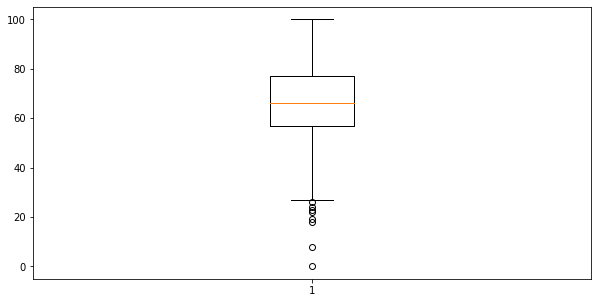

In [ ]:
fig = plt.figure(figsize =(10, 5))
aa = plt.boxplot(df['math score'])
ab = plt.show()

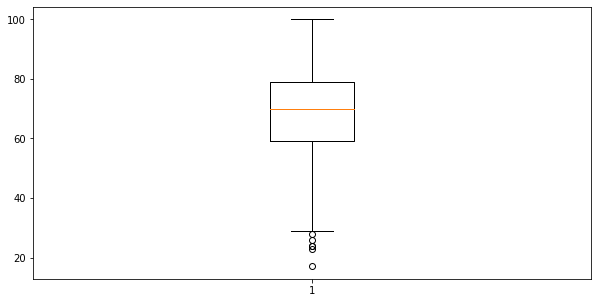

In [ ]:
# fixing outliers for math score column
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 5))
aa = plt.boxplot(df['reading score'])
ab = plt.show()

In [ ]:
# finding the 1st quartile
q1 = np.quantile(df['reading score'], 0.25)

# finding the 3rd quartile
q3 = np.quantile(df['reading score'], 0.75)
med = np.median(df['reading score'])

# finding the interquartile region (ipr)
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('iqr:         ', iqr, '\nupper_bound: ', upper_bound, '\nlower_bound: ', lower_bound)

iqr:          20.0 
upper_bound:  109.0 
lower_bound:  29.0


In [ ]:
outliers = df['reading score'][(df['reading score'] <= lower_bound) | (df['reading score'] >= upper_bound)]
print('Outlier Count: ', outliers.count())
print('The following are the outliers in the boxplot:\n {} '.format(outliers))

Outlier Count:  8
The following are the outliers in the boxplot:
 59     17
76     26
211    28
327    23
596    24
601    29
896    29
980    24
Name: reading score, dtype: int64 


In [ ]:
# replacing outliers with mean value
Mean = df['reading score'].mean()
df = df.replace([outliers], Mean)
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,1.0,1.0,1.0,1.0,72.0,72.0,74.0
1,0.0,2.0,4.0,1.0,0.0,69.0,90.0,88.0
2,0.0,1.0,3.0,1.0,1.0,90.0,95.0,93.0
3,1.0,0.0,0.0,0.0,1.0,47.0,57.0,44.0
4,1.0,2.0,4.0,1.0,1.0,76.0,78.0,75.0


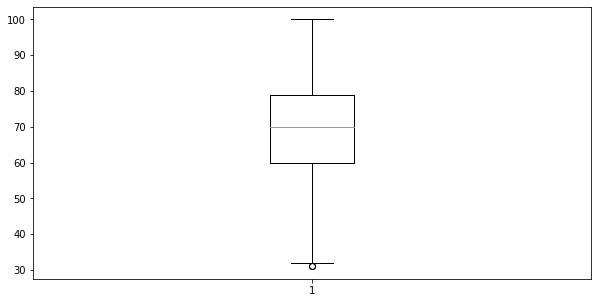

In [ ]:
fig = plt.figure(figsize =(10, 5))
aa = plt.boxplot(df['reading score'])
ab = plt.show()